# Import libraries for fetching Bitcoin data, preprocessing, model training, and evaluation with various ML algorithms.


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score

# Fetch Bitcoin price data, add day index, create target as next day's close price, and display first few rows.

In [ ]:
btc = yf.download("BTC-USD")
btc["Day"] = np.arange(1, len(btc)+1)

btc["Target"] = btc["Close"].shift(-1)
btc.dropna(inplace=True)

btc.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Day,Target
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
Date,,,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,1,424.440002
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,2,394.795990
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,3,408.903992
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,4,398.821014
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,5,402.152008


In [ ]:
X =  btc.drop(columns=["Target"])
Y = btc["Target"]


train_test_split(X,
                 Y,
    shuffle=False,
    test_size=0.1
)

[Price              Close          High           Low          Open  \
 Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
 Date                                                                 
 2014-09-17    457.334015    468.174011    452.421997    465.864014   
 2014-09-18    424.440002    456.859985    413.104004    456.859985   
 2014-09-19    394.795990    427.834991    384.532013    424.102997   
 2014-09-20    408.903992    423.295990    389.882996    394.673004   
 2014-09-21    398.821014    412.425995    393.181000    408.084991   
 ...                  ...           ...           ...           ...   
 2024-04-22  66837.679688  67233.960938  64548.179688  64935.632812   
 2024-04-23  66407.273438  67199.242188  65864.867188  66839.890625   
 2024-04-24  64276.898438  67075.367188  63589.871094  66408.718750   
 2024-04-25  64481.707031  65275.207031  62783.632812  64275.019531   
 2024-04-26  63755.320312  64789.656250  63322.398438  64485.371094   
 
 Pri

# Train and evaluate multiple ML models and a SimpleRNN on dummy Bitcoin price data, comparing MSE and R2 scores.

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 2499640576.0000
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2499424768.0000 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2499426560.0000 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2498160128.0000 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2499662336.0000  
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2499289856.0000  
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2497834496.0000 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2495901696.0000 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2490320896.0000 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2476802816.0000  
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2443336960.0000 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2372748544.0000 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2228993536.0000 
Epoch

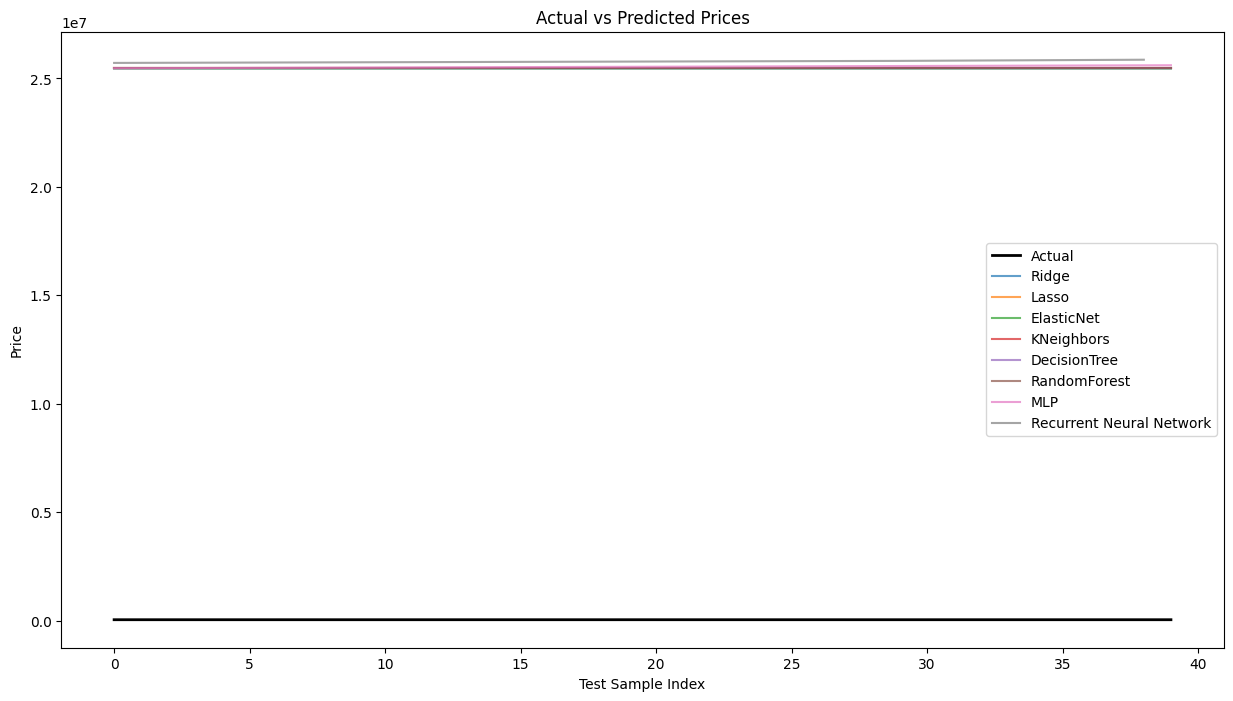

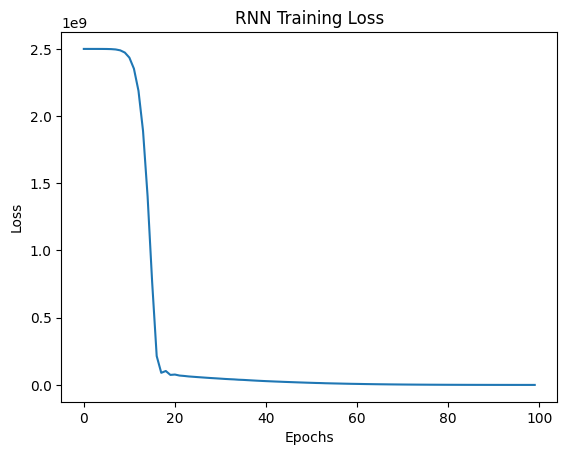

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# --- Data Preparation ---
np.random.seed(42)
num_points = 200
btc = pd.DataFrame({
    'Day': np.arange(1, num_points + 1),
    'Target': np.random.randn(num_points) * 100 + 50000  # Dummy target prices
})

X = btc[['Day']].values
y = btc['Target'].values

# Split into train/test (temporal split)
split_ratio = 0.8
split_idx = int(len(X) * split_ratio)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# --- Standardize features and target ---
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# --- Train Models with Best Hyperparameters ---
models = {}

# Ridge Regression
ridge = Ridge(alpha=100.0, solver='auto')
ridge.fit(X_train_scaled, y_train)
models['Ridge'] = ridge

# Lasso Regression
lasso = Lasso(alpha=10.0, max_iter=1000)
lasso.fit(X_train_scaled, y_train)
models['Lasso'] = lasso

# ElasticNet Regression
elastic = ElasticNet(alpha=1.0, l1_ratio=0.9, max_iter=1000)
elastic.fit(X_train_scaled, y_train)
models['ElasticNet'] = elastic

# K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=10, algorithm='auto', weights='uniform')
knn.fit(X_train_scaled, y_train)
models['KNeighbors'] = knn

# Decision Tree
dt = DecisionTreeRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=5)
dt.fit(X_train_scaled, y_train)
models['DecisionTree'] = dt

# Random Forest
rf = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=100)
rf.fit(X_train_scaled, y_train)
models['RandomForest'] = rf

# MLP Regressor
mlp = MLPRegressor(activation='relu', hidden_layer_sizes=(100,), solver='lbfgs', max_iter=1000)
mlp.fit(X_train_scaled, y_train)
models['MLP'] = mlp

# --- Evaluation Function ---
def evaluate_model(model, X_test, y_test, scaler_y):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_pred, mse, r2

# --- Prepare Data for RNN ---
def create_sequences(X, y, seq_length=5):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

seq_length = 5
X_seq, y_seq = create_sequences(X, y, seq_length)

# Standardize sequences
scaler_seq_X = MinMaxScaler()
X_seq_reshaped = X_seq.reshape(-1, 1)
X_seq_scaled = scaler_seq_X.fit_transform(X_seq_reshaped).reshape(X_seq.shape)

# Split sequences
split_idx_seq = int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq_scaled[:split_idx_seq], X_seq_scaled[split_idx_seq:]
y_train_seq, y_test_seq = y_seq[:split_idx_seq], y_seq[split_idx_seq:]

# --- Build RNN with improved architecture ---
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

model_rnn = Sequential()
model_rnn.add(Input(shape=(seq_length, 1)))
model_rnn.add(SimpleRNN(50, activation='relu'))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train RNN
history = model_rnn.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

# --- Evaluate All Models ---
results = []

for name, model in models.items():
    y_pred_scaled, mse, r2 = evaluate_model(model, X_test_scaled, y_test, scaler_y)
    # Inverse transform predictions
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
    results.append({'Model': name, 'MSE': mse, 'R2': r2, 'Predictions': y_pred})

# Evaluate RNN
y_pred_rnn_scaled = model_rnn.predict(X_test_seq).flatten()
y_pred_rnn = scaler_y.inverse_transform(y_pred_rnn_scaled.reshape(-1,1)).flatten()

mse_rnn = mean_squared_error(y_test_seq, y_pred_rnn)
r2_rnn = r2_score(y_test_seq, y_pred_rnn)

results.append({'Model': 'Recurrent Neural Network', 'MSE': mse_rnn, 'R2': r2_rnn, 'Predictions': y_pred_rnn})

# --- Create Summary DataFrame ---
summary_df = pd.DataFrame(results).sort_values(by='MSE')
print("\nModel Performance Summary:")
print(summary_df[['Model', 'MSE', 'R2']].to_string(index=False))

# --- Plot Actual vs Predicted for all models ---
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='Actual', color='black', linewidth=2)

for res in results:
    plt.plot(res['Predictions'], label=res['Model'], alpha=0.7)

plt.xlabel('Test Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Optional: Plot training loss for RNN
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RNN Training Loss')
plt.show()


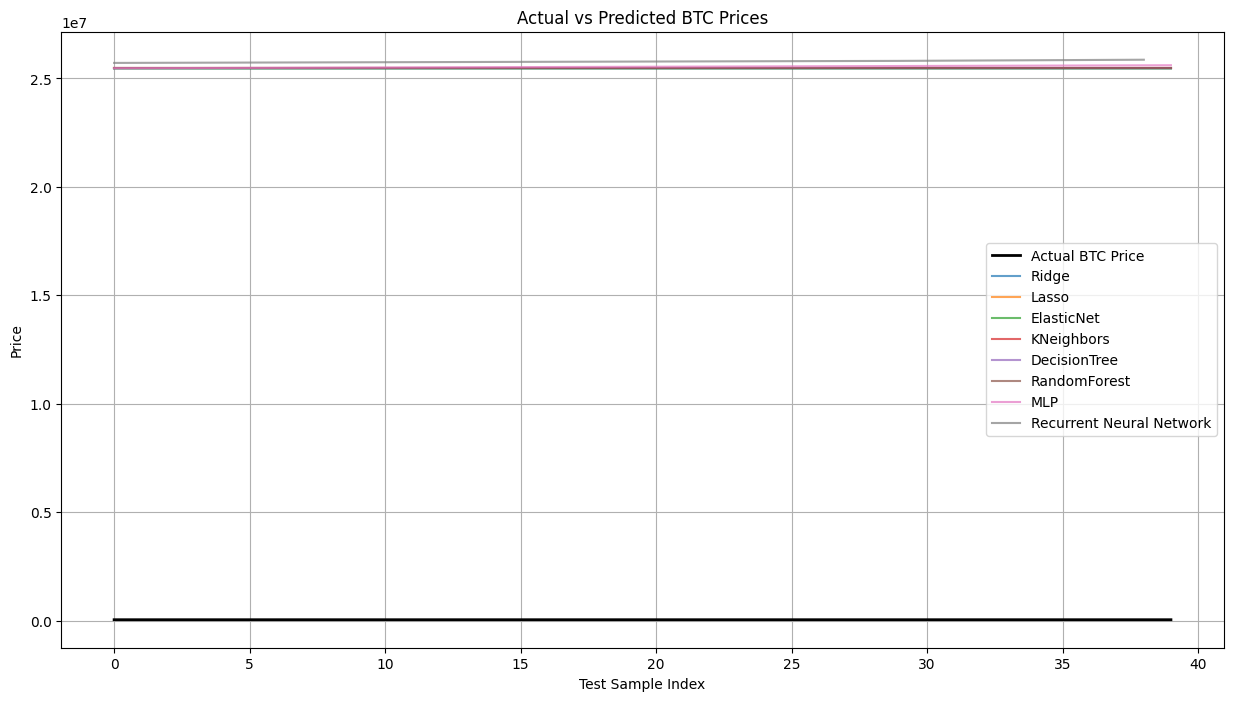

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='Actual BTC Price', color='black', linewidth=2)

for res in results:
    plt.plot(res['Predictions'], label=res['Model'], alpha=0.7)

plt.xlabel('Test Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted BTC Prices')
plt.legend()
plt.grid(True)
plt.show()

# Train and evaluate ML models with lag features and a SimpleRNN on dummy Bitcoin data, with hyperparameter tuning and visualizations.

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 2499122432.0000
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2498331904.0000  
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2499759872.0000 
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2498548480.0000 
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2496148224.0000 
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2490077184.0000 
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2467746816.0000 
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2404568320.0000 
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2231152384.0000 
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1817785472.0000 
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1049328256.0000 
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 235214368.0000 
Epoch 13/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 167559328.0000  
Epoch 14/200
10/10 ━

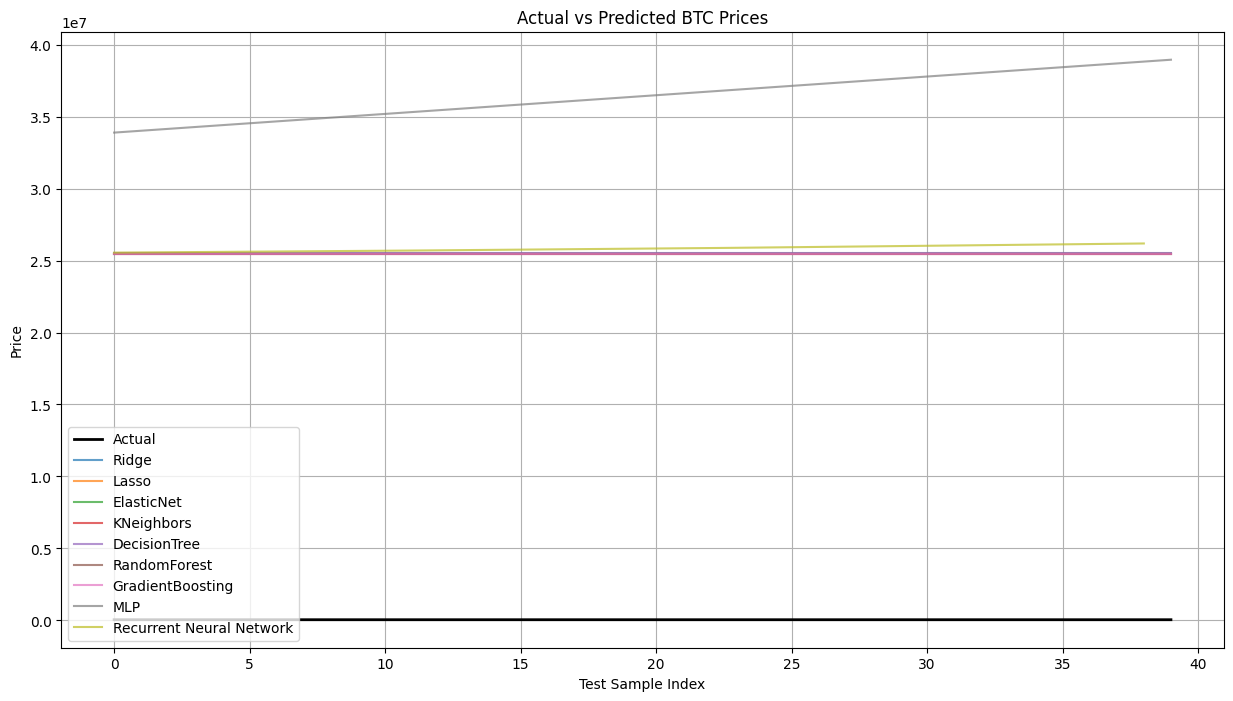

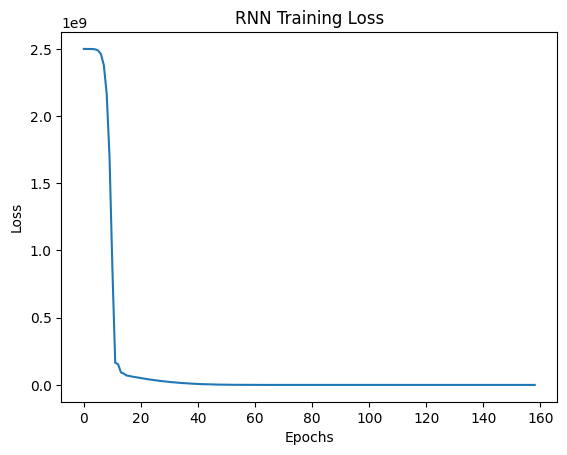

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# --- Data Preparation ---
np.random.seed(42)
num_points = 200
btc = pd.DataFrame({
    'Day': np.arange(1, num_points + 1),
    'Target': np.random.randn(num_points) * 100 + 50000  # Dummy target prices
})

X = btc[['Day']].values
y = btc['Target'].values

# Generate lag features to provide more context
lag = 3  # number of previous days to consider
X_lag = []
y_lag = []

for i in range(lag, len(X)):
    X_lag.append(X[i-lag:i].flatten())  # previous lag days
    y_lag.append(y[i])

X_lag = np.array(X_lag)
y_lag = np.array(y_lag)

# Split into train/test
split_ratio = 0.8
split_idx = int(len(X_lag) * split_ratio)
X_train, X_test = X_lag[:split_idx], X_lag[split_idx:]
y_train, y_test = y_lag[:split_idx], y_lag[split_idx:]

# Standardize features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# --- Model training with hyperparameter tuning for some models ---

models = {}

# Ridge Regression with hyperparameter tuning
ridge_params = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
ridge_grid.fit(X_train_scaled, y_train)
models['Ridge'] = ridge_grid.best_estimator_

# Lasso Regression with hyperparameter tuning
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(max_iter=1000), lasso_params, cv=3)
lasso_grid.fit(X_train_scaled, y_train)
models['Lasso'] = lasso_grid.best_estimator_

# ElasticNet with hyperparameter tuning
elastic_params = {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
elastic_grid = GridSearchCV(ElasticNet(max_iter=1000), elastic_params, cv=3)
elastic_grid.fit(X_train_scaled, y_train)
models['ElasticNet'] = elastic_grid.best_estimator_

# KNN
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
models['KNeighbors'] = knn

# Decision Tree with tuning
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=3)
dt_grid.fit(X_train_scaled, y_train)
models['DecisionTree'] = dt_grid.best_estimator_

# Random Forest with tuning
rf_params = {'n_estimators': [50, 100], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=3)
rf_grid.fit(X_train_scaled, y_train)
models['RandomForest'] = rf_grid.best_estimator_

# Gradient Boosting Regressor
gb_params = {'n_estimators': [50, 100], 'max_depth': [3, 5, 10]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=3)
gb_grid.fit(X_train_scaled, y_train)
models['GradientBoosting'] = gb_grid.best_estimator_

# MLP Regressor with deeper network
mlp = MLPRegressor(hidden_layer_sizes=(200, 100), activation='relu', solver='adam', max_iter=2000)
mlp.fit(X_train_scaled, y_train)
models['MLP'] = mlp

# --- Define evaluation ---
def evaluate_model(model, X_test, y_test, scaler_y):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_pred, mse, r2

# Prepare data for RNN
def create_sequences(X, y, seq_length=5):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

seq_length = 5
X_seq, y_seq = create_sequences(X, y, seq_length)

# Standardize sequences
scaler_seq_X = MinMaxScaler()
X_seq_reshaped = X_seq.reshape(-1, 1)
X_seq_scaled = scaler_seq_X.fit_transform(X_seq_reshaped).reshape(X_seq.shape)

# Split sequences
split_idx_seq = int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq_scaled[:split_idx_seq], X_seq_scaled[split_idx_seq:]
y_train_seq, y_test_seq = y_seq[:split_idx_seq], y_seq[split_idx_seq:]

# --- Build and train RNN with more epochs and early stopping ---
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

model_rnn = Sequential()
model_rnn.add(Input(shape=(seq_length, 1)))
model_rnn.add(SimpleRNN(100, activation='relu'))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history = model_rnn.fit(
    X_train_seq, y_train_seq,
    epochs=200,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

# --- Evaluate all models ---
results = []

for name, model in models.items():
    y_pred_scaled, mse, r2 = evaluate_model(model, X_test_scaled, y_test, scaler_y)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
    results.append({'Model': name, 'MSE': mse, 'R2': r2, 'Predictions': y_pred})

# Evaluate RNN
y_pred_rnn_scaled = model_rnn.predict(X_test_seq).flatten()
y_pred_rnn = scaler_y.inverse_transform(y_pred_rnn_scaled.reshape(-1,1)).flatten()
mse_rnn = mean_squared_error(y_test_seq, y_pred_rnn)
r2_rnn = r2_score(y_test_seq, y_pred_rnn)
results.append({'Model': 'Recurrent Neural Network', 'MSE': mse_rnn, 'R2': r2_rnn, 'Predictions': y_pred_rnn})

# --- Create summary DataFrame ---
summary_df = pd.DataFrame(results).sort_values(by='MSE')
print("\nModel Performance Summary:")
print(summary_df[['Model', 'MSE', 'R2']].to_string(index=False))

# --- Plot Actual vs Predicted for all models ---
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='Actual', color='black', linewidth=2)

for res in results:
    plt.plot(res['Predictions'], label=res['Model'], alpha=0.7)

plt.xlabel('Test Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted BTC Prices')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plot training loss for RNN
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RNN Training Loss')
plt.show()


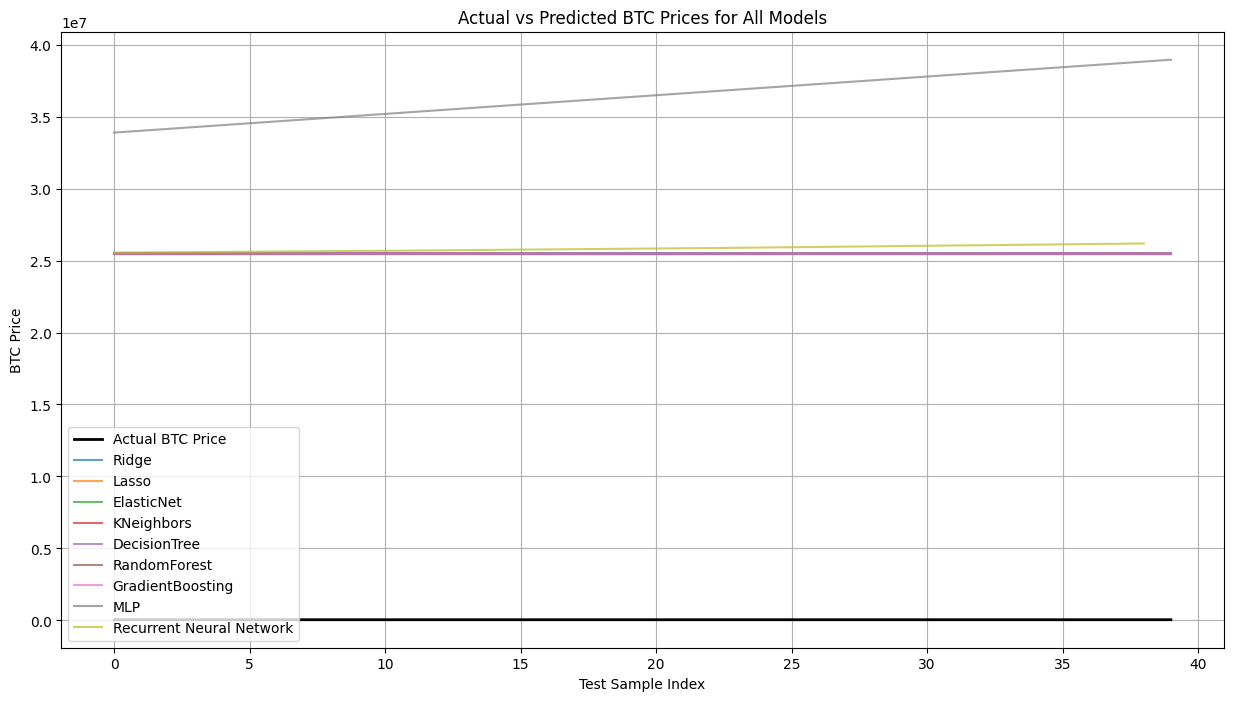

In [ ]:
import matplotlib.pyplot as plt

# Plot actual BTC prices
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='Actual BTC Price', color='black', linewidth=2)

# Plot predictions from all models
for res in results:
    plt.plot(res['Predictions'], label=res['Model'], alpha=0.7)

plt.xlabel('Test Sample Index')
plt.ylabel('BTC Price')
plt.title('Actual vs Predicted BTC Prices for All Models')
plt.legend()
plt.grid(True)
plt.show()


# Fetch Bitcoin data, train a SimpleRNN model for price prediction, and visualize actual vs. predicted prices with ROC curve for price direction.

[*********************100%***********************]  1 of 1 completed


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 433579712.0000
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 133357656.0000
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8409668.0000
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7542301.0000
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8192326.0000
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7949658.0000
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7270667.5000
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7386881.5000
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7200557.0000
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7052518.5000
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7581152.5000
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7405432.5000
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8984010.0000
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7022477.0000
Epoch 1

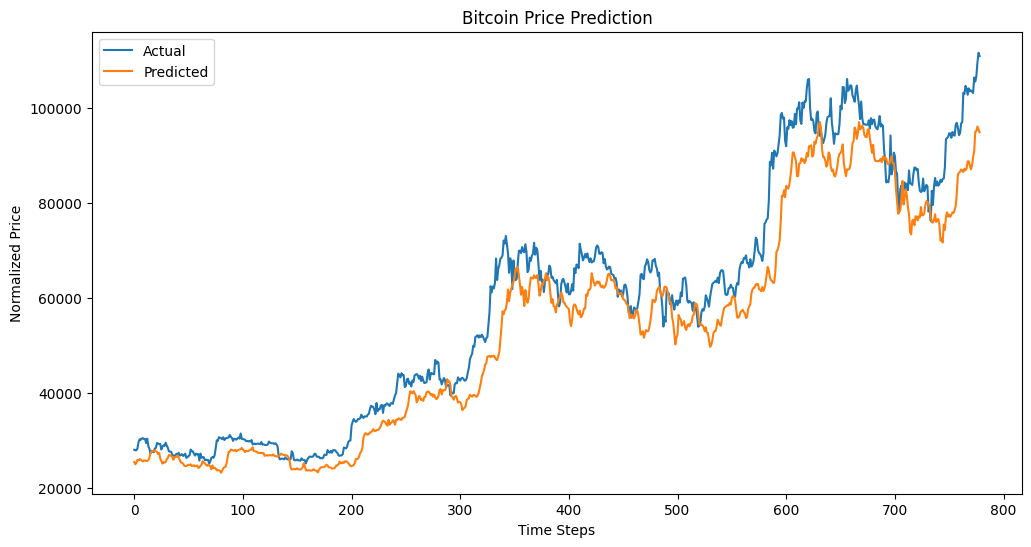

ValueError: operands could not be broadcast together with shapes (779,) (778,) 

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Download Bitcoin data
btc = yf.download("BTC-USD")
btc["Day"] = np.arange(1, len(btc)+1)

# Create target as next day's close
btc["Target"] = btc["Close"].shift(-1)
btc.dropna(inplace=True)

# Select features and target
features = ["Close"]
target = "Target"

# Normalize features
scaler = MinMaxScaler()
btc[features] = scaler.fit_transform(btc[features])

# Prepare data for RNN: create sequences
sequence_length = 10  # you can tune this
X = []
y = []

for i in range(len(btc) - sequence_length):
    X.append(btc[features].iloc[i:i+sequence_length].values)
    y.append(btc[target].iloc[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


from tensorflow.keras.layers import SimpleRNN

# Build RNN (LSTM) model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predictions
y_pred = model.predict(X_test)

# Plot predicted vs actual prices
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Price')
plt.show()

# Since this is a regression task, ROC curve isn't typical.
# But if you want to classify whether the price will go up or down:
# Create labels for up/down movement
delta_actual = y_test - y_test[:-1]
delta_pred = y_pred - y_test[:-1]

# For simplicity, create binary labels:
# 1 if price goes up, 0 if goes down
# Note: We need to align sizes
# Truncate last element for alignment
delta_actual = delta_actual[1:]
delta_pred = delta_pred[:-1]

true_labels = (delta_actual > 0).astype(int)
pred_scores = (delta_pred > 0).astype(int)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, pred_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bitcoin Price Direction Prediction')
plt.legend(loc='lower right')
plt.show()


**powerd by Miracle⚡**